In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/BostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
x_data = df.copy()
tf.random.set_seed(777)

x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
y_data = x_data.pop('MEDV')

print(x_data.head())
print(y_data.head())

x_data.info()

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33

[5 rows x 13 columns]
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=13, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 42,497
Trainable params: 42,497
Non-trainable params: 0
_________________________________________________________________


In [9]:
optimizer= tf.keras.optimizers.SGD(learning_rate=0.04)
loss= tf.keras.losses.mean_absolute_error
metrics= tf.keras.metrics.RootMeanSquaredError()

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [10]:
result = model.fit(x_data, y_data, epochs=100, batch_size=10)

Epoch 1/100
51/51 [==============================] - 1s 2ms/step - loss: 7.6434 - root_mean_squared_error: 10.7458
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 6.6013 - root_mean_squared_error: 9.3161
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 6.4403 - root_mean_squared_error: 9.1601
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 6.5283 - root_mean_squared_error: 9.3400
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 6.3114 - root_mean_squared_error: 9.0053
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 6.2574 - root_mean_squared_error: 8.9385
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 6.2694 - root_mean_squared_error: 9.0124
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 6.4398 - root_mean_squared_error: 9.2038
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 6.3986 - root_

In [11]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


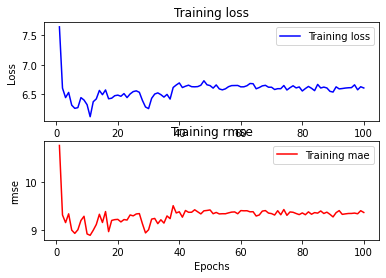

In [15]:
loss = result.history['loss']

epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae)+1)

plt.subplot(212)
plt.plot(epochs, mae, 'r-', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

In [16]:
print(model.evaluate(x_data, y_data))
print("\n Test rmse : %.4f" % (model.evaluate(x_data, y_data)[1]))

16/16 [==============================] - 0s 2ms/step - loss: 6.5312 - root_mean_squared_error: 9.2910
[6.531200408935547, 9.291031837463379]
16/16 [==============================] - 0s 2ms/step - loss: 6.5312 - root_mean_squared_error: 9.2910

 Test rmse : 9.2910
